# Notebook to Compute Flow Law Parameters
by Mike Durand, December 2021

In [1]:
# 1) add FLaPE-Byrd repository location (pulled from github.com/mikedurand/flape-byrd) to the path
import sys
sys.path.append('/Users/mtd/GitHub/FLaPE-Byrd/') 

In [2]:
# 2) import needed modules
# 2) import needed modules
from ReachObservations import ReachObservations
from ReachTruth import ReachTruth
from RiverIO import RiverIO
from FlowLawCalibration import FlowLawCalibration
from Domain import Domain
from pprint import pprint
from FlowLaws import MWACN,MWAPN,AHGW,AHGD,MWHCN,MWAVN,MOMMA,MWHFN,PVK


In [3]:
# 3) provide path to reach averaged Sagavanirktok data from hi-res commercial imagery, and read data in
BaseDir='ArcticDEMSag/'
#BaseDir='PepsiSac/'
IO=RiverIO('MetroManTxt',obsFname=BaseDir+'SWOTobs.txt',truthFname=BaseDir+'truth.txt')

In [4]:
# 4) Set up data objects
D=Domain(IO.ObsData)
Obs=ReachObservations(D,IO.ObsData,True)
Truth=ReachTruth(IO.TruthData)

# The Obs class supports spatially and temporally varying data. 
# This example notebook uses the first reach in the data.
ReachDict={}
ReachDict['dA']=Obs.dA[0,:]
ReachDict['w']=Obs.w[0,:]
ReachDict['S']=Obs.S[0,:]
ReachDict['H']=Obs.h[0,:]            
ReachDict['Qtrue']=Truth.Q[0,:]


In [5]:
# 5) Set up Flow Law variants
Variants=['AHGW', 'AHGD','HeightManning','Constant-n','PowerLaw-n','MWAVN','MOMMA']  

FlowLawVariants={} #stash flow law variant objects for each reach in a dict       
if 'Constant-n' in Variants:     
    FlowLawVariants['Constant-n']=MWACN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])        

if 'PowerLaw-n' in Variants:
    FlowLawVariants['PowerLaw-n']=MWAPN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])               

if 'AHGW' in Variants:
    FlowLawVariants['AHGW']=AHGW(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])           

if 'AHGD' in Variants:
    FlowLawVariants['AHGD']=AHGD(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])           

if 'HeightManning' in Variants:
    FlowLawVariants['HeightManning']=MWHCN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])           

if 'MWAVN' in Variants:
    FlowLawVariants['MWAVN']=MWAVN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])           

if 'MOMMA' in Variants:
    FlowLawVariants['MOMMA']=MWAVN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])                                       

if 'FixedManning' in Variants:
    FlowLawVariants['FixedManning']=MWHFN(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])                                       

if 'PVK' in Variants:
    FlowLawVariants['PVK']=PVK(ReachDict['dA'],ReachDict['w'],ReachDict['S'],ReachDict['H'])                                       


In [6]:
# 6 Perform calibration
cal={} #make a dictionary of results, keyed off the flow law variant name
for variant in FlowLawVariants.keys():               
    flow_law_cal=FlowLawCalibration(D,ReachDict['Qtrue'],FlowLawVariants[variant])
    flow_law_cal.CalibrateReach(verbose=False,suppress_warnings=True)
    cal[variant]=flow_law_cal      


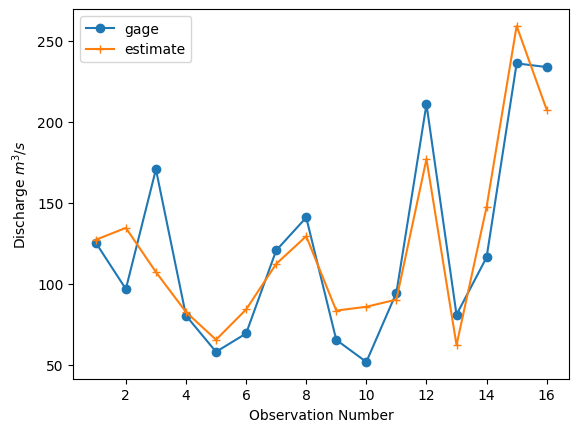

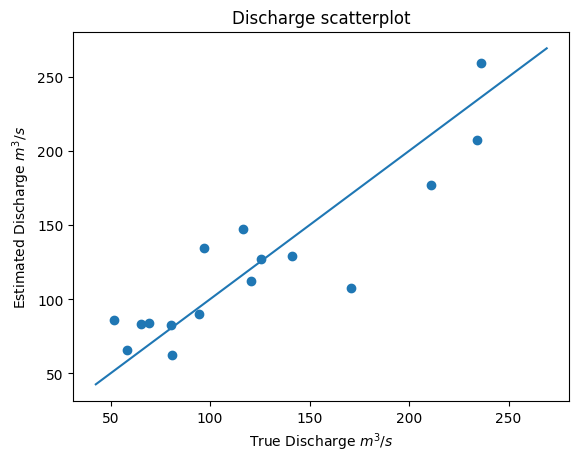

In [7]:
# 7 Visualize results: timeseries and scatterplot
cal['PowerLaw-n'].PlotTimeseries()
cal['PowerLaw-n'].PlotScatterplot()

In [8]:
# 8 Error metrics
cal['PowerLaw-n'].Performance.ShowKeyErrorMetrics()

Normalized RMSE: 0.22
nMAE: 0.17
r: 0.90
KGE: 0.84
NSE: 0.80
RMSE/std(Q): 0.45
